In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
data=pd.read_excel(r"C:\Users\dell\Downloads\iris_1.xls")

In [8]:
#checking number of rows and columns
data.shape

(150, 5)

In [9]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
#checking name of columns
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [11]:
#describing data
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
#checkn for missing values
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [13]:
#null values filled with median 
data['SL'].fillna(data['SL'].mean(),inplace=True)
data['SW'].fillna(data['SW'].mean(),inplace=True)
data['PL'].fillna(data['PL'].mean(),inplace=True)

In [14]:
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [15]:
#checking for duplicate data
data[data.duplicated()]

,SL,SW,PL,PW,Classification
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [17]:
#removind duplicated values
data.drop_duplicates(inplace = True)
data[data.duplicated()]

,SL,SW,PL,PW,Classification


In [18]:
#checking for non integer or float type
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              147 non-null    float64
 1   SW              147 non-null    float64
 2   PL              147 non-null    float64
 3   PW              147 non-null    float64
 4   Classification  147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [19]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Classification']=le.fit_transform(data['Classification'])
data.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


In [20]:
#checking correlation
rel=data.corr()

<AxesSubplot:>

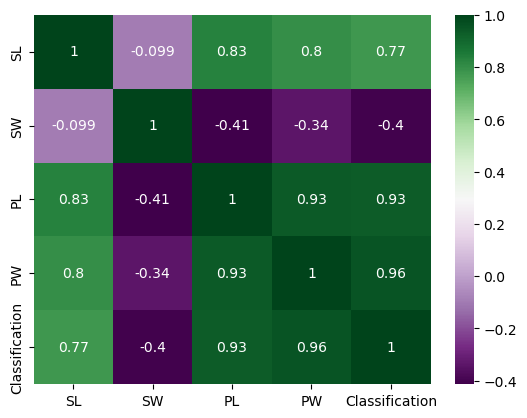

In [21]:
#heatmap of correlation
sns.heatmap(rel,cmap='PRGn',annot=True)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


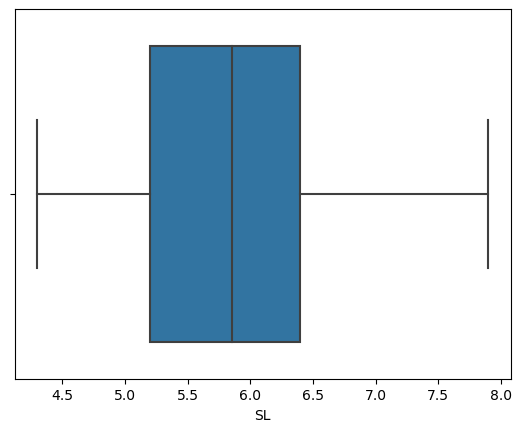

In [22]:
#checking outliers
sns.boxplot(data['SL'])
plt.show()

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


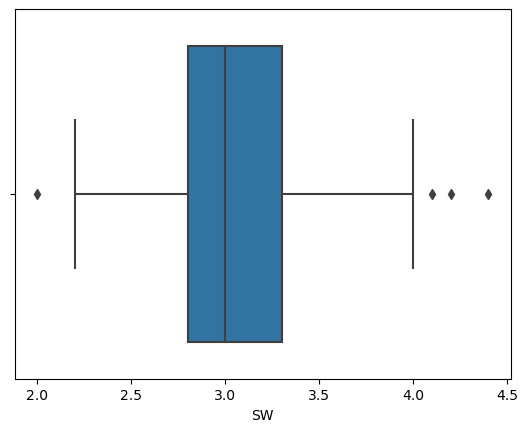

In [23]:
sns.boxplot(data['SW'])
plt.show()

In [24]:
#removing outliers in SW
Q1=data['SW'].quantile(0.25)
Q3=data['SW'].quantile(0.75)
IQR=Q3-Q1
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
data.loc[data.SW>upper_limit]

,SL,SW,PL,PW,Classification
15,5.7,4.4,1.5,0.4,0
32,5.2,4.1,1.5,0.1,0
33,5.5,4.2,1.4,0.2,0


In [25]:
data.loc[data.SW>upper_limit,'SW']=np.median(data.SW)
data.loc[data.SW>upper_limit]

,SL,SW,PL,PW,Classification


In [26]:
data.loc[data.SW<lower_limit]

,SL,SW,PL,PW,Classification
60,5.0,2.0,3.5,1.0,1


In [27]:
data.loc[data.SW<lower_limit,'SW']=np.median(data.SW)
data.loc[data.SW<lower_limit]

,SL,SW,PL,PW,Classification


In [28]:
print(np.median(data.SW))

3.0


C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


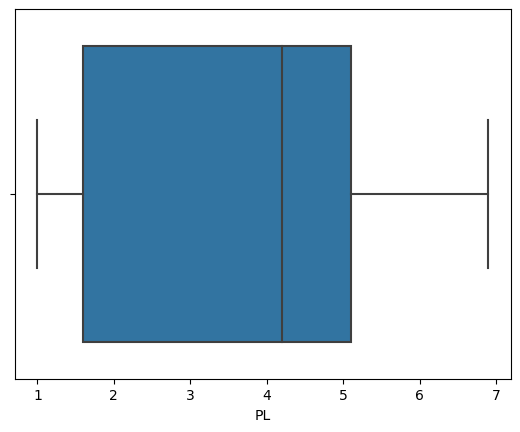

In [29]:
sns.boxplot(data['PL'])
plt.show()

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


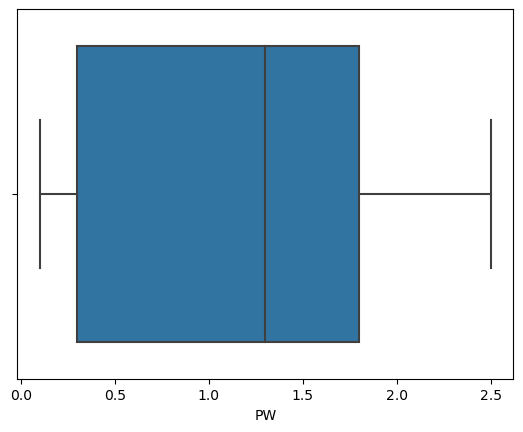

In [30]:
sns.boxplot(data['PW'])
plt.show()

In [31]:
from sklearn.preprocessing import StandardScaler
x=data.drop(['Classification'],axis=1)
y=data[['Classification']]
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [32]:
#forming test and train data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [34]:
#logistic regresion
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model=log_model.fit(x_train,y_train)
y_pred=log_model.predict(x_test)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
y_pred

array([2, 1, 2, 0, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1, 2, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 2])

In [36]:
y_test

,Classification
127,2
53,1
140,2
19,0
106,2
12,0
78,1
31,0
83,1
9,0


In [41]:
#find accuracy,precision,recall
from sklearn.metrics import f1_score,precision_score,accuracy_score,recall_score,confusion_matrix
print('Accuracy = ',accuracy_score(y_test,y_pred))
from numpy.lib.function_base import average
print('Precission = ',precision_score(y_test,y_pred,average='micro'))
print('Recall = ',recall_score(y_test,y_pred,average='micro'))

Accuracy =  0.9459459459459459
Precission =  0.9459459459459459
Recall =  0.9459459459459459


In [42]:
#finding confuion matrix
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0,  8,  2],
       [ 0,  0, 13]], dtype=int64)

In [43]:
#KNN model
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)

In [44]:
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k , metric ='euclidean')
  classifier.fit(x_train,y_train)
  y_pred1=classifier.predict(x_test)
  acc1 = accuracy_score(y_test,y_pred1)
  metric_k.append(acc1)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

In [45]:
metric_k

[0.972972972972973,
 0.9459459459459459,
 0.972972972972973,
 0.918918918918919,
 0.9459459459459459,
 0.9459459459459459,
 0.9459459459459459,
 0.918918918918919,
 0.918918918918919,
 0.918918918918919,
 0.918918918918919,
 0.918918918918919]

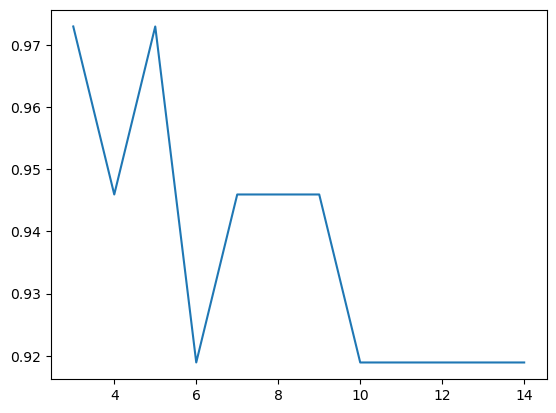

In [47]:
plt.plot(neighbors,metric_k)
plt.xlabel='K'
plt.ylabel='Accuracy'
plt.show()

In [50]:
classifier=KNeighborsClassifier(n_neighbors=5 , metric ='euclidean')
classifier.fit(x_train,y_train)
y_pred2=classifier.predict(x_test)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [52]:
#finding accuracy,precision,recall
print('Accuracy = ',accuracy_score(y_test,y_pred2))
print('Precission = ',precision_score(y_test,y_pred2,average='micro'))
print('Recall = ',recall_score(y_test,y_pred2,average='micro'))

Accuracy =  0.972972972972973
Precission =  0.972972972972973
Recall =  0.972972972972973


In [53]:
#finding confusion matrix
confusion_matrix(y_test,y_pred2)

array([[14,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 13]], dtype=int64)

In [54]:
#SVM method linear
from sklearn.svm import SVC
svm_cls=SVC(kernel='linear')
svm_cls=svm_cls.fit(x_train,y_train)
y_pred3=svm_cls.predict(x_test)
print('Accuracy = ',accuracy_score(y_pred3,y_test))
confusion_matrix(y_pred3,y_test)


Accuracy =  0.9459459459459459


C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[14,  0,  0],
       [ 0,  8,  0],
       [ 0,  2, 13]], dtype=int64)

In [55]:
#RBF
svm_cls1=SVC(kernel='rbf')
svm_cls1=svm_cls1.fit(x_train,y_train)
y_pred4=svm_cls1.predict(x_test)
print('Accuracy = ',accuracy_score(y_pred4,y_test))
confusion_matrix(y_pred4,y_test)

Accuracy =  0.972972972972973


C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[14,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 13]], dtype=int64)

In [57]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
dt_cls=DecisionTreeClassifier()
dt_cls=dt_cls.fit(x_train,y_train)
y_pred5=dt_cls.predict(x_test)
print('Accuracy = ',accuracy_score(y_pred5,y_test))
confusion_matrix(y_pred5,y_test)

Accuracy =  0.918918918918919


array([[14,  0,  0],
       [ 0,  9,  2],
       [ 0,  1, 11]], dtype=int64)

In [58]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
rf_cl=RandomForestClassifier()
rf_cl=rf_cl.fit(x_train,y_train)
y_pred6=rf_cl.predict(x_test)
print('Accuracy = ',accuracy_score(y_pred6,y_test))
confusion_matrix(y_pred6,y_test)

Accuracy =  0.9459459459459459


C:\Users\dell\AppData\Local\Temp\ipykernel_8944\1177812430.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_cl=rf_cl.fit(x_train,y_train)


array([[14,  0,  0],
       [ 0,  9,  1],
       [ 0,  1, 12]], dtype=int64)

In [ ]:
#Highest accuracy in KNN and in SVM(RBF) method